### Experimento de Millikan: Carga Elementar do Elétron
#### Consta nesse arquivo os códigos utilizados para os cálculos dos valores e propagações de incerteza.
##### Paulo Henrique Lorenzoni Filho

In [1]:
from uncertainties import ufloat, unumpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


#### Criando um arranjo (array) com os valores de tempo e distância e sua incerteza associada

In [2]:
# Os arrays, nesse caso, são matrizes 1x20. Por exemplo: (x1 +/- i1, x2 +/- i2, ...)
x= np.array([       ufloat(0.00089,0.00001),ufloat(0.00089,0.00001),ufloat(0.00089,0.00001),ufloat(0.00089,0.00001),ufloat(0.00089,0.00001),
                    ufloat(0.00178,0.00002),ufloat(0.00178,0.00002),ufloat(0.00178,0.00002),ufloat(0.00178,0.00002),ufloat(0.00178,0.00002),
                    ufloat(0.00267,0.00003),ufloat(0.00267,0.00003),ufloat(0.00267,0.00003),ufloat(0.00267,0.00003),ufloat(0.00267,0.00003),
                    ufloat(0.00356,0.00004),ufloat(0.00356,0.00004),ufloat(0.00356,0.00004),ufloat(0.00356,0.00004),ufloat(0.00356,0.00004)]) # Distância de subida

t_subida=np.array([ufloat(12.079,0.001),ufloat(12.479,0.001),ufloat(12.879,0.001),ufloat(2.669,0.001),ufloat(12.965,0.001),
                   ufloat(21.566,0.002),ufloat(5.978,0.002),ufloat(9.675,0.002),ufloat(4.871,0.002),ufloat(8.574,0.002),
                   ufloat(5.303,0.003),ufloat(3.868,0.003),ufloat(7.072,0.003),ufloat(5.104,0.003),ufloat(4.436,0.003),
                   ufloat(8.763,0.004),ufloat(5.464,0.004),ufloat(10.408,0.004),ufloat(8.207,0.004),ufloat(14.879,0.004)])

t_descida=np.array([ufloat(4.705,0.001),ufloat(5.072,0.001),ufloat(4.838,0.001),ufloat(2.169,0.001),ufloat(5.832,0.001),
                    ufloat(8.241,0.002),ufloat(4.501,0.002),ufloat(6.976,0.002),ufloat(4.002,0.002),ufloat(6.409,0.002),
                    ufloat(4.936,0.003),ufloat(3.502,0.003),ufloat(6.119,0.003),ufloat(4.602,0.003),ufloat(3.869,0.003),
                    ufloat(7.197,0.004),ufloat(4.998,0.004),ufloat(8.407,0.004),ufloat(6.973,0.004),ufloat(9.975,0.004)])

v_subida=x/t_subida
v_descida=x/t_descida

#### A equação do raio (6) pode ser reescrita como:      
$$r=c\sqrt{ |v_s - v_d|}$$
Onde $c=\frac{3}{2}\sqrt{\frac{\eta}{g(\rho_{óleo}-\rho_{ar})}}=constante$       
Calculando c a partir dos valores dados, resulta em:

In [3]:
c=(3/2)*(0.0000182/9.79*(1030-1.293))**(1/2)#constante do raio


In [4]:
r=c*(abs(v_subida-v_descida))**(1/2) # Raio da gota

In [5]:
raio=unumpy.nominal_values(r)*10**4
inr=unumpy.std_devs(r)
raio

array([7.04908456, 6.69449953, 7.03003497, 5.75118579, 6.01059619,
       7.57792508, 6.4840931 , 5.53431883, 5.84324017, 5.4933027 ,
       4.01348578, 5.57155375, 5.03004862, 4.95518991, 6.16074852,
       6.16737243, 5.11264856, 5.91869325, 5.74727508, 7.11440133])

#### Para o calculo da carga (equação 7), temos:


In [6]:
n=0.0000182 #Coeficiente de viscosidade do ar
g=9.79
do=1030 #densidade óleo
da=1.293 #densidade ar
d=ufloat(0.00250,0.00001) #distância entre as placas do capacitor c/ incerteza
U=np.array([ufloat(300,5),ufloat(300,5),ufloat(300,5),ufloat(300,5),ufloat(300,5),
           ufloat(400,5),ufloat(400,5),ufloat(400,5),ufloat(400,5),ufloat(400,5),
           ufloat(500,5),ufloat(500,5),ufloat(500,5),ufloat(500,5),ufloat(500,5),
           ufloat(600,5),ufloat(600,5),ufloat(600,5),ufloat(600,5),ufloat(600,5)])


In [7]:
Q=(9*np.pi*d/2)*(((n**3)/(g*(do-da)))**(1/2))*(((v_subida+v_descida)/U)*((abs(v_subida-v_descida))**(1/2)))

In [8]:

#print(format(unumpy.nominal_values(q)))
inQ=np.array(unumpy.std_devs(Q))
cargas=np.array(unumpy.nominal_values(Q))


In [9]:
pd.set_option('display.precision',2)
pd.set_option('display.max_colwidth', 10)
df=pd.DataFrame({'Qe-19C':10**(19)*cargas, "$\delta$q":inQ*10**(21)/100,'Raio e-4':raio,'$\delta$r':inr*10**(6)/100}, 
                index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

df


,Qe-19C,$\delta$q,Raio e-4,$\delta$r
1,2.57,0.06,7.05,0.04
2,2.30,0.06,6.69,0.04
3,2.47,0.06,7.03,0.04
4,5.94,0.14,5.75,0.03
5,1.85,0.04,6.01,0.03
6,2.36,0.05,7.58,0.04
7,4.68,0.1,6.48,0.04
8,2.53,0.05,5.53,0.03
9,4.93,0.11,5.84,0.03
10,2.78,0.06,5.49,0.03


In [10]:
x=[0,0,0,0]
Y=[1.85,2.97,4.99,6.67]

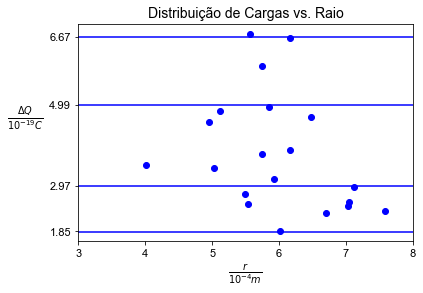

In [11]:
plt.rcParams.update({'font.sans-serif':'Arial'})
fig, ax = plt.subplots()
ax.set_title('Distribuição de Cargas vs. Raio',fontsize=14)
ax.tick_params(axis='both', labelsize=11)
ax.scatter(raio, 10**(19)*cargas,color='blue')
ax.tick_params(axis='y', rotation=0)
ax.axhline(y=1.84, xmin=0, xmax=1,color='blue')
ax.axhline(y=2.97, xmin=0, xmax=1,color='blue')
ax.axhline(y=4.99, xmin=0, xmax=1,color='blue')
ax.axhline(y=6.67, xmin=0, xmax=1,color='blue')
ax.set_yticks(Y)
ax.set_xlim(3,8)

ax.set_ylabel(r'$\frac {\Delta Q}{10^{-19}C}$',fontsize=14,rotation=0, labelpad=24)
ax.set_xlabel(r'$\frac{r}{10^{-4}m}$',fontsize=14)



#ax.grid(axis='y')
#plt.savefig('cxr.PNG',dpi=450)
plt.show()


In [12]:
pd.set_option('display.max_colwidth', 50)
pd.DataFrame({'Intervalo entre linhas (e-19C)':['1.85 ± 0.04',"1.12 ± 0.02","2.0 ± 0.1",'1.67 ± 0.02',"1.66 ± 0.05"]},
             index=['L1-Ex', 'L2-L1','L3-L2','L4-L3','Média (e ± $\delta_e$)'])

,Intervalo entre linhas (e-19C)
L1-Ex,1.85 ± 0.04
L2-L1,1.12 ± 0.02
L3-L2,2.0 ± 0.1
L4-L3,1.67 ± 0.02
Média (e ± $\delta_e$),1.66 ± 0.05


In [13]:
N=df['Qe-19C'][:]/1.6

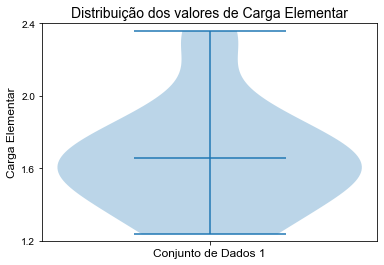

In [14]:
his=pd.DataFrame({'Qe-19C':10**(19)*cargas, "n":round(N,0),'Q/n':df['Qe-19C'][:]/round(N,0)},  index=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
                             
carga_elementar=his['Q/n'][:] #Valores obtidos para carga elementar do eletron

fig, ax=plt.subplots()
ax.set_title('Distribuição dos valores de Carga Elementar',fontsize=14) #Título da Figura
ax.set_ylabel('Carga Elementar', fontsize=12) #Nome do eixo Y
ax.set_xticks([1]) #Ajustando o eixo x pra 1 conjunto de dados
ax.set_xticklabels(['Conjunto de Dados 1'],fontsize=12) # Nomeando o conjunto de dados
ax.set_ylim(1.2,2.4) #Limites do eixo Y
ax.set_yticks(np.arange(1.2,2.8,0.4)) #Estabelecendo o intervalo de valores do eixo Y (0.4 em 0.4 até o limite)
ax.violinplot(carga_elementar, showmeans=True, showmedians=False) #Plotando o violino junto com a média
#plt.savefig('expMillikan.png',dpi=350,facecolor='w') #Salvando a figura com 350dpi
plt.show()